<a href="https://colab.research.google.com/github/ujjwalbasnyat/feature_engineering/blob/main/Feature_Engineering_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Engineering & Model Selection

##### [TOTAL POINTS: 22]

##  Learning Objectives

By the end of this assignment, students should be able to:

* Apply necessary preprocessing steps to prepare the data for modeling.
* Perform feature engineering such as handling missing values, binning numerical variables, and extracting new features.
* Train and fine-tune a **Decision Tree classifier** using **scikit-learn**, and evaluate it using **cross-validation** and **validation splits**.
* Evaluate and compare multiple classification models (e.g., **Random Forest**, **XGBoost**) and build an effective **ensemble model**.

## Problem Description

The **Titanic** was a British passenger liner that tragically sank during its maiden voyage in 1912. The dataset you'll work with contains information about the passengers on board — such as their age, sex, ticket class, and whether they survived.

Your task is to build a machine learning pipeline to **predict whether a passenger survived the Titanic disaster** using the provided features. Throughout the assignment, you will preprocess the data, engineer meaningful features, build various classifiers, and evaluate their performance.

Let’s begin by importing the necessary libraries.

In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost scikit-optimize -q

In [ ]:
# Task: Import necessary libraries for data analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

%matplotlib inline
sns.set()

### Load the Dataset <span style="float: right;">[1 pt]</span>

Load the `train.csv` and `test.csv` files using pandas.

In [ ]:
### Ex-1-Task-1
# Load the Titanic dataset

df_train = None
df_test = None

### BEGIN SOLUTION
# YOUR CODE HERE
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
# raise NotImplementedError()
### END SOLUTION

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# INTENTIONALLY LEFT BLANK

### Store Target & Concatenate Datasets <span style="float: right;">[1 pt]</span>

- Store the `Survived` column from the training set into a separate variable.
- Concatenate the training set (without the `Survived` column) and the test set into a single DataFrame called `data`.


In [ ]:
### Ex-1-Task-2
# Task: Store the target variable in a separate variable and concatenate train and test data

survived_train = None
data = None

### BEGIN SOLUTION
# YOUR CODE HERE
survived_train = df_train['Survived']
data = df_train.drop('Survived', axis=1)
# raise NotImplementedError()
### END SOLUTION

In [ ]:
# INTENTIONALLY LEFT BLANK

In [ ]:
# Task: View basic info of the concatenated dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


### Extract Title from Name <span style="float: right;">[2 pts]</span>

Extract the passenger's title (such as **Mr**, **Mrs**, **Miss**, etc.) from the `Name` column using a regular expression,  
and store it in a new column called `Title`.

For example, given names like:  
- `Braund, Mr. Owen Harris` → Title: `Mr`
- `Heikkinen, Miss. Laina` → Title: `Miss`

Use a regex pattern that captures the word that appears between a space and a period following the surname.

In [ ]:
### Ex-2-Task-1
# Task: Extract 'Title' from Name column and plot distribution

data['Title'] = None

### BEGIN SOLUTION
# YOUR CODE HERE
data['Title'] = data['Name'].str.extract(r',\s*(\w+)\.')
# raise NotImplementedError()
### END SOLUTION

In [ ]:
# INTENTIONALLY LEFT BLANK

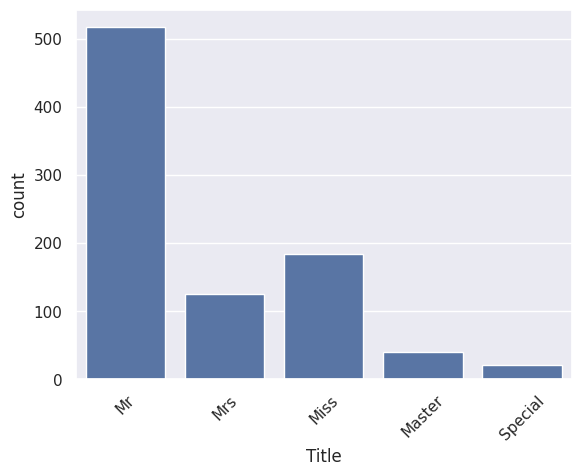

In [ ]:
# Task: Plot the title count
sns.countplot(x='Title', data=data)
plt.xticks(rotation=45)
plt.show()

### Normalize and Group Titles <span style="float: right;">[2 pts]</span>

- Normalize similar titles by replacing:  
    - `'Mlle'` with `'Miss'`  
    - `'Mme'` with `'Mrs'`  
    - `'Ms'` with `'Miss'`

- Then, group rare titles such as `'Don'`, `'Dona'`, `'Rev'`, `'Dr'`, `'Major'`, `'Lady'`, `'Sir'`, `'Col'`, `'Capt'`, `'Countess'`, and `'Jonkheer'` into a single category called `'Special'`.


In [ ]:
### Ex-2-Task-2
# Task: Normalize rare titles to 'Special' and others

### BEGIN SOLUTION
# YOUR CODE HERE
title_map = {
    'Mlle': 'Miss',
    'Ms': 'Miss',
    'Mme': 'Mrs',
    'Lady': 'Special',
    'Countess': 'Special',
    'Capt': 'Special',
    'Col': 'Special',
    'Don': 'Special',
    'Dr': 'Special',
    'Major': 'Special',
    'Rev': 'Special',
    'Sir': 'Special',
    'Jonkheer': 'Special',
    'Dona': 'Special'  # sometimes in extended versions of the dataset
}

data['Title'] = data['Title'].replace(title_map)
# raise NotImplementedError()
### END SOLUTION

In [ ]:
# INTENTIONALLY LEFT BLANK

### Create Binary Cabin Indicator  <span style="float: right;">[1 pt]</span>

Create a new binary column `Has_Cabin` that indicates whether a passenger has cabin information (`True` if present, `False` if missing).

In [ ]:
### Ex-3-Task-1
# Task: Add a binary column for presence of Cabin info

data['Has_Cabin'] = None

### BEGIN SOLUTION
# YOUR CODE HERE
data['Has_Cabin'] = data['Cabin'].notnull()
# raise NotImplementedError()
### END SOLUTION

In [ ]:
# INTENTIONALLY LEFT BLANK

In [ ]:
# Task: Drop irrelevant columns
data.drop(['Cabin', 'Name', 'PassengerId', 'Ticket'], axis=1, inplace=True)

### Impute Missing Values  <span style="float: right;">[2 pts]</span>

Fill missing values in the dataset as follows:  
- Replace missing `Age` values with the median age.  
- Replace missing `Fare` values with the median fare.  
- Replace missing `Embarked` values with the most common port `'S'`.

In [ ]:
### Ex-4-Task-1
# Task: Impute missing values in Age, Fare, Embarked

### BEGIN SOLUTION
# YOUR CODE HERE
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Fare'] = data['Fare'].fillna(data['Fare'].median())
data['Embarked'] = data['Embarked'].fillna('S')

# raise NotImplementedError()
### END SOLUTION


In [ ]:
# INTENTIONALLY LEFT BLANK

### Bin Age and Fare into Categories  <span style="float: right;">[2 pts]</span>

- Convert the numerical columns `Age` and `Fare` into categorical variables by dividing them into 4 equal-sized groups (quartiles).  
- Store the group labels in new columns `CatAge` and `CatFare`.  
- Drop the original `Age` and `Fare` columns after binning.

In [ ]:
### Ex-4-Task-2
# Task: Bin Age and Fare into categorical variables

data['CatAge'] = None
data['CatFare'] = None

### BEGIN SOLUTION
# YOUR CODE HERE
data['CatAge'] = pd.qcut(data['Age'], q=4, labels=[0,1,2,3])
data['CateFare'] = pd.qcut(data['Fare'], q=4, labels=[0,1,2,3])

data.drop(['Age', 'Fare'], axis=1, inplace=True)
# raise NotImplementedError()
### END SOLUTION

In [ ]:
# INTENTIONALLY LEFT BLANK

### Create Family Size and Drop Columns  <span style="float: right;">[1 pt]</span>

Create a new column `Fam_Size` by summing `SibSp` and `Parch`, then drop the original `SibSp` and `Parch` columns.

In [ ]:
### Ex-5-Task-1
# Task: Create family size and drop SibSp, Parch

### BEGIN SOLUTION
# YOUR CODE HERE
data['Fam_Size'] = None
# data[['SibSp', 'Parch']]
data['Fam_Size'] = data['SibSp'] + data['Parch'] + 1
data.drop(['SibSp', 'Parch'], axis=1, inplace=True)
# raise NotImplementedError()
### END SOLUTION

In [ ]:
# INTENTIONALLY LEFT BLANK

### One-Hot Encode Categorical Variables  <span style="float: right;">[1 pt]</span>

Convert categorical variables into one-hot encoded dummy variables, dropping the first category to avoid multicollinearity.


In [ ]:
### Ex-5-Task-2

data_dum = None

### BEGIN SOLUTION
# YOUR CODE HERE
data_dum = pd.get_dummies(data, drop_first=True)
# raise NotImplementedError()
### END SOLUTION

In [ ]:
# INTENTIONALLY LEFT BLANK

In [ ]:
# Task: Split data into training and test sets
data_train = data_dum.iloc[:891]
data_test = data_dum.iloc[891:]

X = data_train.values
test = data_test.values
y = survived_train.values

### Tune Decision Tree with RandomizedSearchCV  <span style="float: right;">[3 pts]</span>

- Use `RandomizedSearchCV` to tune a `DecisionTreeClassifier`’s `max_depth` parameter, searching over values from 1 to 9, with a fixed random seed.
- Perform 5 iterations with 5-fold cross-validation and fit the model to the training data.

**Note:** Import libraries inside `begin solution` and `end solution`

In [ ]:
### Ex-6-Task-1

seed=42
np.random.seed(seed)

param_dist = {
}
clf = None     # Decision Tree Classifier
clf_cv = None  # Randomized Search CV

### BEGIN SOLUTION
# YOUR CODE HERE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'max_depth': np.arange(1,10)
}

clf = DecisionTreeClassifier(random_state = seed)

# set up the RandomizedSearchCV
clf_cv = RandomizedSearchCV(estimator=clf, param_distributions=param_dist, n_iter=5, cv=5, random_state=seed)
clf_cv.fit(X,y)

# raise NotImplementedError()
### END SOLUTION

print("Tuned Decision Tree Parameters: {}".format(clf_cv.best_params_))
print("Best score is {}".format(clf_cv.best_score_))

Tuned Decision Tree Parameters: {'max_depth': np.int64(8)}
Best score is 0.8136840123030569


In [ ]:
# INTENTIONALLY LEFT BLANK

### Tune Random Forest with RandomizedSearchCV  <span style="float: right;">[3 pts]</span>

Use `RandomizedSearchCV` to tune a `RandomForestClassifier` with parameters:  
- `n_estimators`: [50, 100, 200]  
- `max_depth`: [None, 3, 5, 10]  
- `max_features`: ['sqrt', 'log2']  

Use a fixed random seed, run 5 iterations with 5-fold cross-validation, and fit the model.


In [ ]:
### Ex-6-Task-2

rf_param_dist = {}
rf = None     # Random Forest Classifier
rf_cv = None  # Randomized Search CV

### BEGIN SOLUTION
# YOUR CODE HERE
from sklearn.ensemble import RandomForestClassifier
rf_param_dist = {
    'n_estimators': [50,100,200],
    'max_depth' : [None, 3,5,10],
    'max_features': ['sqrt', 'log2']
}
rf=RandomForestClassifier(random_state=42)
rf_cv = RandomizedSearchCV(estimator=rf, param_distributions=rf_param_dist, n_iter=5, cv=5, random_state=42)
rf_cv.fit(X,y)
# raise NotImplementedError()
### END SOLUTION

print("Best RF Params:", rf_cv.best_params_)
print("Best CV Score:", rf_cv.best_score_)

Best RF Params: {'n_estimators': 100, 'max_features': 'log2', 'max_depth': 5}
Best CV Score: 0.8103195028560668


In [ ]:
# INTENTIONALLY LEFT BLANK

### Tune XGBoost with Bayesian Optimization  <span style="float: right;">[3 pts]</span>

Use `BayesSearchCV` from `scikit-optimize` to tune an `XGBClassifier`.  
Search over the following hyperparameter space:

- `max_depth`: integers between 3 and 8  
- `n_estimators`: integers between 50 and 100  
- `learning_rate`: log-uniformly between 0.01 and 0.2  

Use 5-fold cross-validation, a fixed random seed, and 20 iterations. Then, fit the model.

In [ ]:
### Ex-6-Task-3

param_space = {}      # Parameter Distribuition for BayesSearchCV
xgb_model = None      # Random Forest Classifier
xgb_cv = None         # BayesSearchCV

### BEGIN SOLUTION
# YOUR CODE HERE
from xgboost import XGBClassifier
from skopt import BayesSearchCV
from skopt.space import Integer, Real

param_space ={
    'max_depth': Integer(3,8),
    'n_estimators': Integer(50,100),
    'learning_rate': Real(0.01, 0.2, prior='log-uniform')
}

xgb_model = XGBClassifier(eval_metric='mlogloss', random_state=42)

xgb_cv = BayesSearchCV(
    estimator = xgb_model,
    search_spaces = param_space,
    n_iter = 20,
    cv=5,
    random_state=42
)
xgb_cv.fit(X,y)
# raise NotImplementedError()
### END SOLUTION

print("Best XGBoost Params:", xgb_cv.best_params_)
print("Best CV Score:", xgb_cv.best_score_)

Best XGBoost Params: OrderedDict([('learning_rate', 0.017526912999060094), ('max_depth', 6), ('n_estimators', 50)])
Best CV Score: 0.8305442219571905


In [ ]:
# INTENTIONALLY LEFT BLANK